In [1]:
import warnings
warnings.filterwarnings("ignore")

# gpt-4o

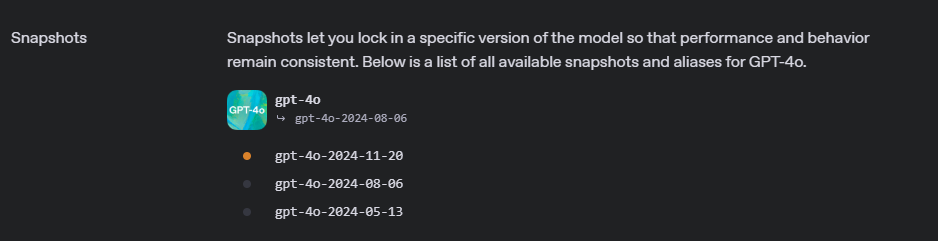

In [2]:
model_name = "gpt-4o-2024-11-20"

In [3]:
import os
os.environ['PATH_TO_ENV'] = ".env_gpt-4o-2024-11-20"

In [4]:
from three_stages_1 import ThreeStagesGraphGenerator as Generator
from three_stages_0i import ThreeStagesGraphGenerator as GeneratorI0

graph_generator = Generator(model_name) # To generate 1st graph from one dialogue
graph_generator_llm = GeneratorI0() # To add dialogue to existing graph with LLM

parser=PydanticOutputParser(pydantic_object=<class 'three_stages_1.DialogueNodes'>) retry_chain=PromptTemplate(input_variables=['completion', 'error', 'instructions'], input_types={}, partial_variables={}, template='Instructions:\n--------------\n{instructions}\n--------------\nCompletion:\n--------------\n{completion}\n--------------\n\nAbove, the Completion did not satisfy the constraints given in the Instructions.\nError:\n--------------\n{error}\n--------------\n\nPlease try again. Please only respond with an answer that satisfies the constraints laid out in the Instructions:')
| ChatOpenAI(client=<openai.resources.chat.completions.completions.Completions object at 0x0000020CE825C250>, async_client=<openai.resources.chat.completions.completions.AsyncCompletions object at 0x0000020CE825EB60>, root_client=<openai.OpenAI object at 0x0000020CE810DF60>, root_async_client=<openai.AsyncOpenAI object at 0x0000020CE825C2B0>, model_name='gpt-4o-mini-2024-07-18', model_kwargs={}, openai_api_k

In [5]:
import json
from dialogue2graph.pipelines.core.dialogue import Dialogue
from dialogue2graph.pipelines.core.graph import Graph

In [6]:
from dialogue2graph.metrics.automatic_metrics import is_same_structure, triplet_match_accuracy

In [7]:
path = '../data/generated_24_with_ids.json'
with open(path, 'r', encoding="utf-8") as f:
    generated_24 = json.load(f)

In [8]:
new_data = []

for id, example in enumerate(generated_24[:5]):
    # new example
    print(id, end='\n\t')
    dialogues = example['dialogues']
    example['incremental'] = {}
    for i in range(len(dialogues)):
        example['incremental'].setdefault(f'graph_{i}')

    # Generation of the 1st graph
    first_dialogue = Dialogue.from_list(dialogues[0]['messages'])
    first_graph = graph_generator.invoke([first_dialogue])
    example['incremental']['graph_0'] = first_graph.graph_dict
    with open(f"../data/gen24_graphid{id}_incrementation.json", "w", encoding="utf-8") as file:
        json.dump(example, file, indent=4, sort_keys=True)

    # graph incrementation
    for i in range(len(dialogues)):
        print(i, end='\t')
        if i == 0:
            result_graph = Graph(example['incremental']['graph_0'])
        else:
            new_dialogue = Dialogue.from_list(dialogues[i]['messages'])
            try:
                result_graph = graph_generator_llm.invoke([new_dialogue], result_graph)
                example['incremental'][f'graph_{i}'] = result_graph.graph_dict

                with open(f"../data/gen24_graphid{id}_incrementation.json", "w", encoding="utf-8") as file:
                    json.dump(example, file, indent=4, sort_keys=True)

            except Exception as e:
                raise e
    print()
    new_data.append(example)

0
	

e:\Projects\chatsky-llm-autoconfig\experiments\exp2025_03_24_graph_incrementation_compare\exp2025_03_17_sample_graph_incrementation\three_stages_1.py:73: LangChainDeprecationWarning: The class `HuggingFaceEmbeddings` was deprecated in LangChain 0.2.2 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-huggingface package and should be used instead. To use it run `pip install -U :class:`~langchain-huggingface` and import as `from :class:`~langchain_huggingface import HuggingFaceEmbeddings``.
  embeddings = HuggingFaceEmbeddings(model_name=env_settings.EMBEDDER_MODEL, model_kwargs={"device": env_settings.EMBEDDER_DEVICE})


0	1	2	3	4	5	
1
	0	1	2	3	4	5	6	7	8	9	10	11	
2
	0	1	2	3	4	5	6	7	8	9	10	11	
3
	0	1	2	3	4	5	6	7	8	
4
	0	1	2	3	4	5	6	7	8	9	10	11	12	


In [9]:
graph_build_result = {}

is_same_structure: False 
----------------
(11, 12)
{1: ['Hi there! How can I assist you today?'], 2: ['Great! What product are you interested in?'], 3: ['Of course! Our products include t-shirts, hoodies, and caps. How can I help you?', 'Sure! We offer t-shirts, hoodies, and caps. What would you like to know?'], 4: ['Alright, feel free to reach out anytime. Have a great day!'], 5: ['What size would you like?'], 6: ['Would you like that in red or blue?'], 7: ['Perfect! Can I have your shipping address?'], 8: ['Thank you! Your order has been placed. Is there anything else I can help you with?'], 9: ['Of course! What would you like to change?']}
The nodes of edges 2->5 and 1->7 have something in common,
                        but not a complete match:
                        Sources: ['Great! What product are you interested in?'], ['Alright, feel free to reach out anytime. Have a great day!', 'Hi there! How can I assist you today?', 'Thank you! Your order has been placed. Is there anyth

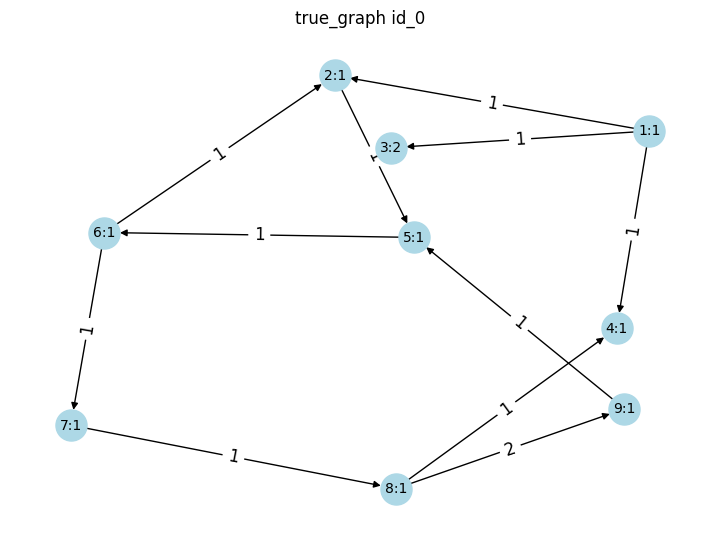

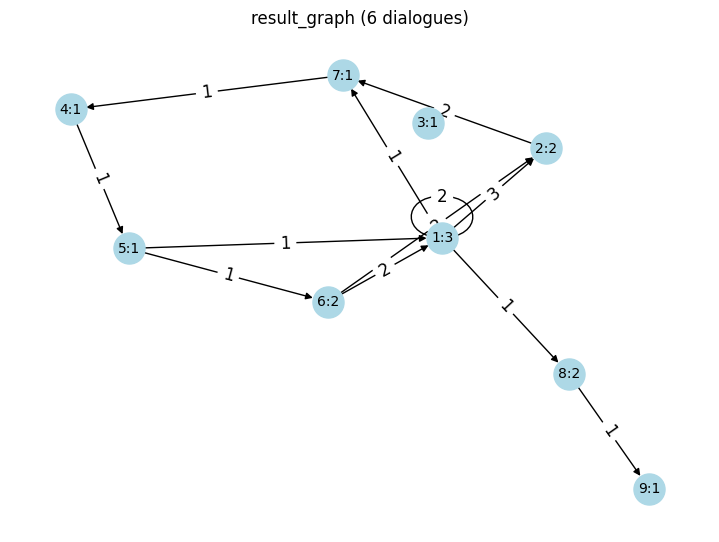

(11, 12)
{1: ['Hi there! How can I assist you today?'], 2: ['Great! What product are you interested in?'], 3: ['Of course! Our products include t-shirts, hoodies, and caps. How can I help you?', 'Sure! We offer t-shirts, hoodies, and caps. What would you like to know?'], 4: ['Alright, feel free to reach out anytime. Have a great day!'], 5: ['What size would you like?'], 6: ['Would you like that in red or blue?'], 7: ['Perfect! Can I have your shipping address?'], 8: ['Thank you! Your order has been placed. Is there anything else I can help you with?'], 9: ['Of course! What would you like to change?']}
The nodes of edges 2->5 and 1->7 have something in common,
                        but not a complete match:
                        Sources: ['Great! What product are you interested in?'], ['Alright, feel free to reach out anytime. Have a great day!', 'Hi there! How can I assist you today?', 'Thank you! Your order has been placed. Is there anything else I can help you with?']
The nodes o

In [10]:
with open("../data/gen24_graphid0_incrementation.json", 'r', encoding="utf-8") as f:
    example = json.load(f)
true_graph = Graph(example['graph'])
graphs = [graph for graph in example['incremental'].values()]
result_graph = Graph(graphs[-1])
print(f'is_same_structure:', is_same_structure(true_graph,result_graph), '\n----------------')
print(f'----------------\ntriplet_match_accuracy:', triplet_match_accuracy(true_graph,result_graph))
true_graph.visualise_short('true_graph id_0')
result_graph.visualise_short(f'result_graph ({len(graphs)} dialogues)')
graph_build_result[0] = triplet_match_accuracy(true_graph,result_graph)

is_same_structure: False 
----------------
(9, 18)
{1: ["Hello! I'm sorry you're experiencing issues. How can I assist you today?"], 2: ["I'm sorry to hear that you're having trouble with your account. Can you please provide more details?"], 3: ['Have you tried resetting your password?'], 4: ["I'm sorry resetting your password didn't help. Would you like me to escalate this issue to our support team?"], 5: ['Certainly! Please provide your new email address.', 'Of course! What email address would you like to use instead?'], 6: ['Your email has been updated successfully. Is there anything else I can help you with?'], 7: ["I've escalated your issue. You should receive an email with further instructions shortly."], 8: ['Thank you for reaching out. Have a great day!', "We're here to help if you need anything else. Goodbye!"]}
The nodes of edges 1->2 and 7->2 have something in common,
                        but not a complete match:
                        Sources: ["Hello! I'm sorry you're

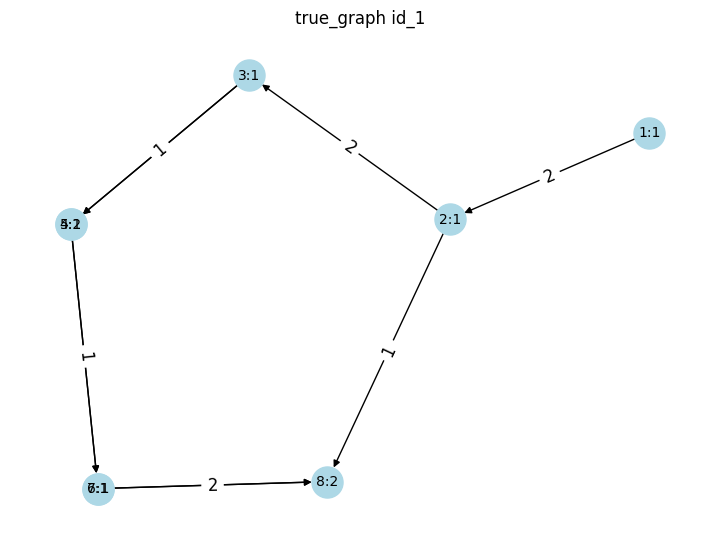

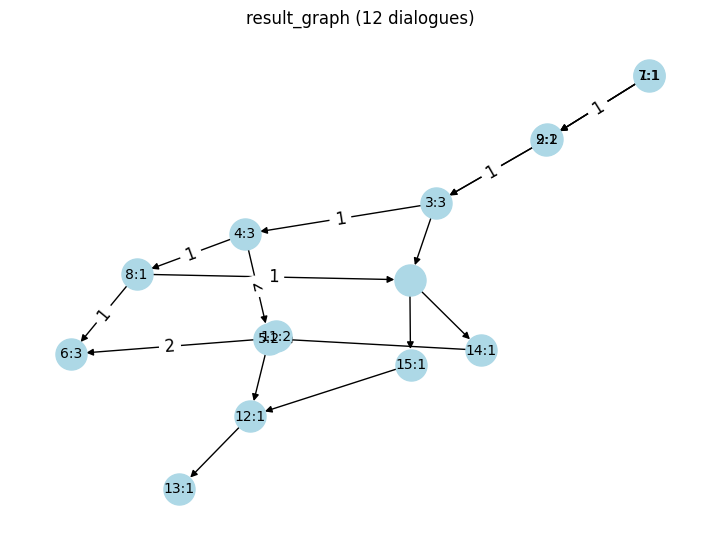

(9, 18)
{1: ["Hello! I'm sorry you're experiencing issues. How can I assist you today?"], 2: ["I'm sorry to hear that you're having trouble with your account. Can you please provide more details?"], 3: ['Have you tried resetting your password?'], 4: ["I'm sorry resetting your password didn't help. Would you like me to escalate this issue to our support team?"], 5: ['Certainly! Please provide your new email address.', 'Of course! What email address would you like to use instead?'], 6: ['Your email has been updated successfully. Is there anything else I can help you with?'], 7: ["I've escalated your issue. You should receive an email with further instructions shortly."], 8: ['Thank you for reaching out. Have a great day!', "We're here to help if you need anything else. Goodbye!"]}
The nodes of edges 1->2 and 7->2 have something in common,
                        but not a complete match:
                        Sources: ["Hello! I'm sorry you're experiencing issues. How can I assist you 

In [11]:
with open("../data/gen24_graphid1_incrementation.json", 'r', encoding="utf-8") as f:
    example = json.load(f)
true_graph = Graph(example['graph'])
graphs = [graph for graph in example['incremental'].values()]
result_graph = Graph(graphs[-1])
print(f'is_same_structure:', is_same_structure(true_graph,result_graph), '\n----------------')
print(f'----------------\ntriplet_match_accuracy:', triplet_match_accuracy(true_graph,result_graph))
true_graph.visualise_short('true_graph id_1')
result_graph.visualise_short(f'result_graph ({len(graphs)} dialogues)')
graph_build_result[1] = triplet_match_accuracy(true_graph,result_graph)

is_same_structure: False 
----------------
(20, 16)
{1: ['Hello! How can I assist you today?'], 2: ["Sure, could you please specify the chatbot limitations you're facing?"], 3: ["I'm sorry to hear that. Can you provide more details about the fake account?"], 4: ['Certainly! Are you looking to respond to positive or negative reviews?'], 5: ['I understand. To help reduce delays, you can try optimizing your response scripts.'], 6: ["I'm sorry the chatbot isn't understanding user queries. You might consider updating its training data."], 7: ['To report impersonation, please visit our support page and submit the account details.'], 8: ['If the account is sending spam messages, you can block and report it directly from the platform.'], 9: ['When responding to negative reviews, maintain professionalism and address the concerns raised.'], 10: ['Acknowledge positive feedback and thank customers for their support to encourage loyalty.'], 11: ['Thank you for reaching out. If you need further assi

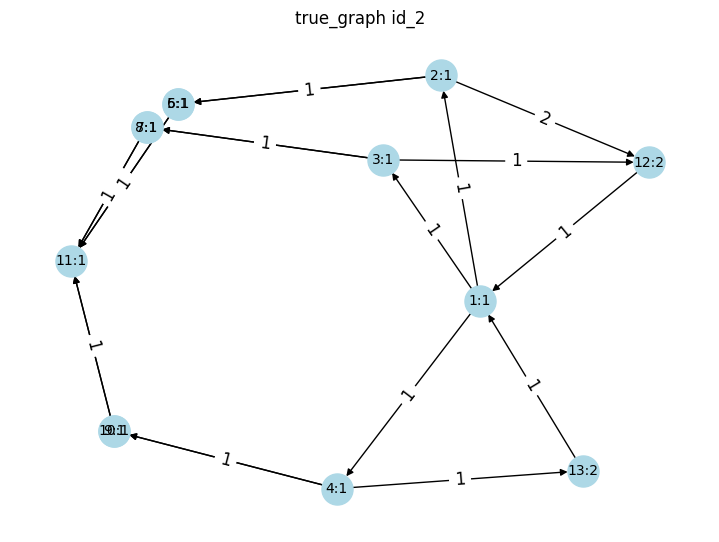

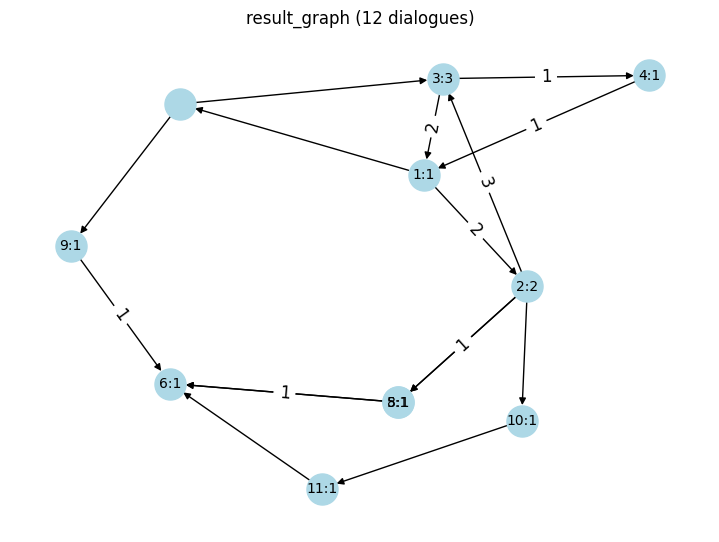

(20, 16)
{1: ['Hello! How can I assist you today?'], 2: ["Sure, could you please specify the chatbot limitations you're facing?"], 3: ["I'm sorry to hear that. Can you provide more details about the fake account?"], 4: ['Certainly! Are you looking to respond to positive or negative reviews?'], 5: ['I understand. To help reduce delays, you can try optimizing your response scripts.'], 6: ["I'm sorry the chatbot isn't understanding user queries. You might consider updating its training data."], 7: ['To report impersonation, please visit our support page and submit the account details.'], 8: ['If the account is sending spam messages, you can block and report it directly from the platform.'], 9: ['When responding to negative reviews, maintain professionalism and address the concerns raised.'], 10: ['Acknowledge positive feedback and thank customers for their support to encourage loyalty.'], 11: ['Thank you for reaching out. If you need further assistance, feel free to ask. Have a great day!

In [12]:
with open("../data/gen24_graphid2_incrementation.json", 'r', encoding="utf-8") as f:
    example = json.load(f)
true_graph = Graph(example['graph'])
graphs = [graph for graph in example['incremental'].values()]
result_graph = Graph(graphs[-1])
print(f'is_same_structure:', is_same_structure(true_graph,result_graph), '\n----------------')
print(f'----------------\ntriplet_match_accuracy:', triplet_match_accuracy(true_graph,result_graph))
true_graph.visualise_short('true_graph id_2')
result_graph.visualise_short(f'result_graph ({len(graphs)} dialogues)')
graph_build_result[2] = triplet_match_accuracy(true_graph,result_graph)

is_same_structure: False 
----------------
(13, 2)
{1: ['Hello! How can I assist you with eco-friendly packaging today?', 'Hi there! What would you like to know about eco-friendly packaging?'], 2: ['Sure! There are several types of eco-friendly packaging such as biodegradable materials, recyclable plastics, and compostable containers. Would you like more details on any of these?'], 3: ['Absolutely! For businesses, sustainable packaging options include using recycled materials, reducing packaging size, and opting for reusable containers. Which of these are you interested in?'], 4: ['Eco-friendly packaging costs can vary based on materials and volume. Generally, they might be slightly more expensive upfront but can lead to savings in the long run through sustainability certifications and consumer preferences. Would you like a detailed cost analysis?'], 5: ['Of course! What types of eco-friendly packaging are you interested in exploring?'], 6: ['No problem! Which sustainable packaging opt

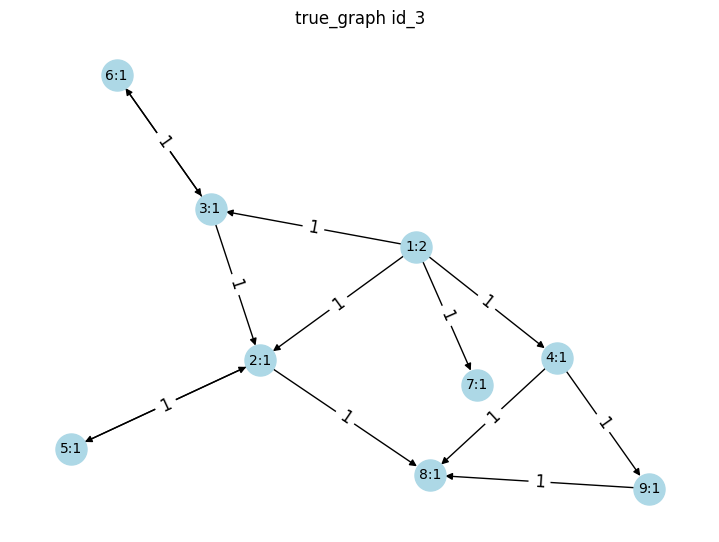

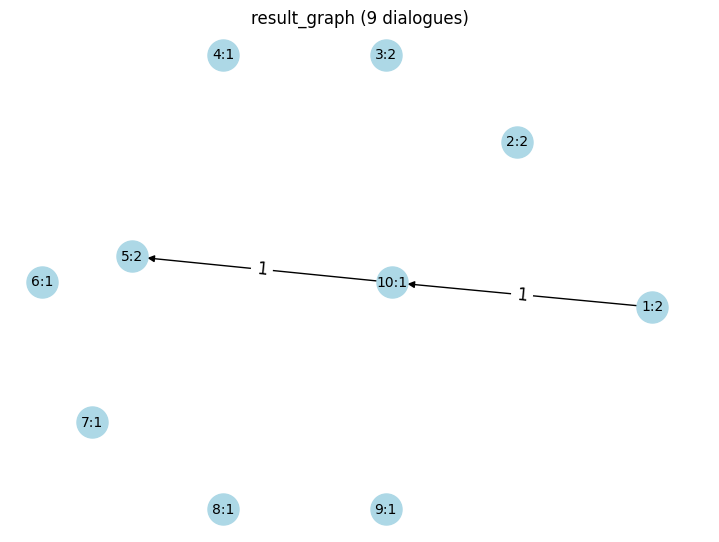

(13, 2)
{1: ['Hello! How can I assist you with eco-friendly packaging today?', 'Hi there! What would you like to know about eco-friendly packaging?'], 2: ['Sure! There are several types of eco-friendly packaging such as biodegradable materials, recyclable plastics, and compostable containers. Would you like more details on any of these?'], 3: ['Absolutely! For businesses, sustainable packaging options include using recycled materials, reducing packaging size, and opting for reusable containers. Which of these are you interested in?'], 4: ['Eco-friendly packaging costs can vary based on materials and volume. Generally, they might be slightly more expensive upfront but can lead to savings in the long run through sustainability certifications and consumer preferences. Would you like a detailed cost analysis?'], 5: ['Of course! What types of eco-friendly packaging are you interested in exploring?'], 6: ['No problem! Which sustainable packaging options would you like to discuss instead?'], 

In [13]:
with open("../data/gen24_graphid3_incrementation.json", 'r', encoding="utf-8") as f:
    example = json.load(f)
true_graph = Graph(example['graph'])
graphs = [graph for graph in example['incremental'].values()]
result_graph = Graph(graphs[-1])
print(f'is_same_structure:', is_same_structure(true_graph,result_graph), '\n----------------')
print(f'----------------\ntriplet_match_accuracy:', triplet_match_accuracy(true_graph,result_graph))
true_graph.visualise_short('true_graph id_3')
result_graph.visualise_short(f'result_graph ({len(graphs)} dialogues)')
graph_build_result[3] = triplet_match_accuracy(true_graph,result_graph)

is_same_structure: False 
----------------
(16, 5)
{1: ['Hello! How can I assist you today?'], 2: ['I understand you have concerns about ethical sourcing. Could you please elaborate on what specifically worries you?'], 3: ['We ensure ethical standards by regularly auditing our suppliers and requiring certifications such as Fair Trade. Would you like more details on our auditing process?'], 4: ['We take the environmental impact seriously by using sustainable materials and reducing our carbon footprint. Would you like to know about our sustainability initiatives?'], 5: ["Sure, let's focus on labor practices. We ensure fair wages and safe working conditions through our comprehensive policies. Do you have specific questions on labor ethics?"], 6: ['Absolutely! Our auditing process includes on-site visits and regular reporting to ensure compliance. Do you have any other questions?', 'Certainly! We conduct thorough inspections and partner with third-party auditors to maintain our standards.'

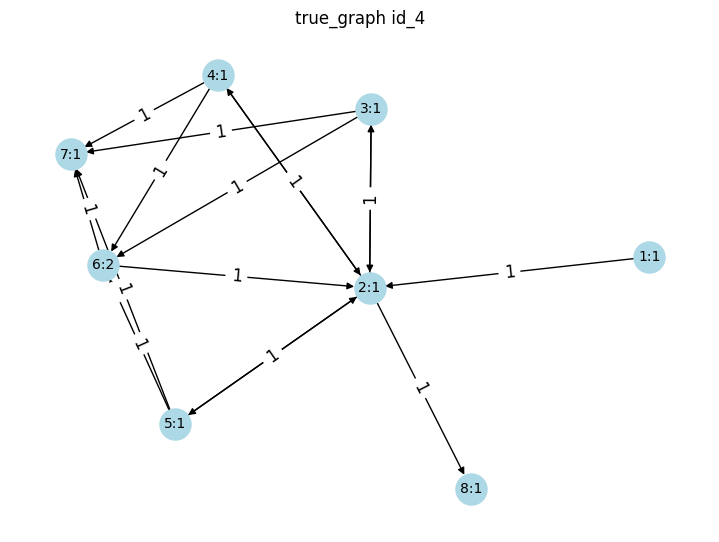

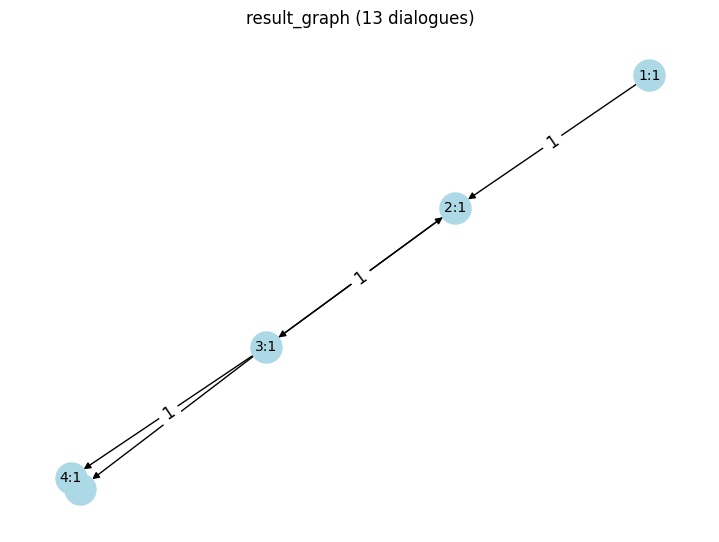

(16, 5)
{1: ['Hello! How can I assist you today?'], 2: ['I understand you have concerns about ethical sourcing. Could you please elaborate on what specifically worries you?'], 3: ['We ensure ethical standards by regularly auditing our suppliers and requiring certifications such as Fair Trade. Would you like more details on our auditing process?'], 4: ['We take the environmental impact seriously by using sustainable materials and reducing our carbon footprint. Would you like to know about our sustainability initiatives?'], 5: ["Sure, let's focus on labor practices. We ensure fair wages and safe working conditions through our comprehensive policies. Do you have specific questions on labor ethics?"], 6: ['Absolutely! Our auditing process includes on-site visits and regular reporting to ensure compliance. Do you have any other questions?', 'Certainly! We conduct thorough inspections and partner with third-party auditors to maintain our standards.'], 7: ["If that's all, I'm glad I could hel

In [14]:
with open("../data/gen24_graphid4_incrementation.json", 'r', encoding="utf-8") as f:
    example = json.load(f)
true_graph = Graph(example['graph'])
graphs = [graph for graph in example['incremental'].values()]
result_graph = Graph(graphs[-1])
print(f'is_same_structure:', is_same_structure(true_graph,result_graph), '\n----------------')
print(f'----------------\ntriplet_match_accuracy:', triplet_match_accuracy(true_graph,result_graph))
true_graph.visualise_short('true_graph id_4')
result_graph.visualise_short(f'result_graph ({len(graphs)} dialogues)')
graph_build_result[4] = triplet_match_accuracy(true_graph,result_graph)

In [15]:
graph_build_result

{0: {'node_accuracy': 1.0, 'edge_accuracy': 0.9090909090909091},
 1: {'node_accuracy': 0.875, 'edge_accuracy': 0.5555555555555556},
 2: {'node_accuracy': 0.0, 'edge_accuracy': 0.0},
 3: {'node_accuracy': 0.2222222222222222,
  'edge_accuracy': 0.07692307692307693},
 4: {'node_accuracy': 0.0, 'edge_accuracy': 0.0}}

In [16]:
import pandas as pd

df = pd.DataFrame(graph_build_result)
df.T.mean()

node_accuracy    0.419444
edge_accuracy    0.308314
dtype: float64

# gpt-4o-mini

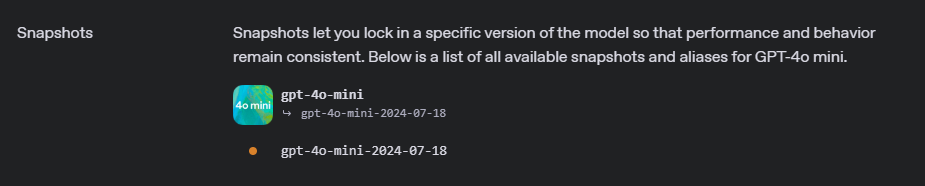

In [1]:
model_name = "gpt-4o-mini-2024-07-18"

In [2]:
import os
os.environ['PATH_TO_ENV'] = ".env_gpt-4o-mini-2024-07-18"

In [3]:
from three_stages_1 import ThreeStagesGraphGenerator as Generator
from three_stages_0i import ThreeStagesGraphGenerator as GeneratorI0

graph_generator = Generator(model_name) # To generate 1st graph from one dialogue
graph_generator_llm = GeneratorI0() # To add dialogue to existing graph with LLM

e:\Projects\chatsky-llm-autoconfig\.venv\lib\site-packages\pydantic\_internal\_fields.py:192: UserWarning: Field name "validate" in "Dialogue" shadows an attribute in parent "BaseModel"
  warnings.warn(
e:\Projects\chatsky-llm-autoconfig\.venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
import json
from dialogue2graph.pipelines.core.dialogue import Dialogue
from dialogue2graph.pipelines.core.graph import Graph

In [5]:
from dialogue2graph.metrics.automatic_metrics import is_same_structure, triplet_match_accuracy

In [6]:
path = '../data2/gen_dataset_augmented_0-402_combined.json'
with open(path, 'r', encoding="utf-8") as f:
    generated_24 = json.load(f)

In [7]:
len(generated_24)

396

In [9]:
new_data = []

for id, example in enumerate(generated_24[:12]):
    # new example
    dialogues = example['dialogues']
    print('ID:', id, ' len: ', len(dialogues),  end='\n\t')
    example['incremental'] = {}
    for i in range(len(dialogues)):
        example['incremental'].setdefault(f'graph_{i}')

    # Generation of the 1st graph
    first_dialogue = Dialogue.from_list(dialogues[0]['messages'])
    first_graph = graph_generator.invoke([first_dialogue])
    example['incremental']['graph_0'] = first_graph.graph_dict
    with open(f"../data2/4o-mini/gen24_graphid{id}_incrementation.json", "w", encoding="utf-8") as file:
        json.dump(example, file, indent=4, sort_keys=True)

    # graph incrementation
    for i in range(len(dialogues)):
        print(i, end=' ')
        if i == 0:
            result_graph = Graph(example['incremental']['graph_0'])
        else:
            new_dialogue = Dialogue.from_list(dialogues[i]['messages'])
            try:
                result_graph = graph_generator_llm.invoke([new_dialogue], result_graph)
                example['incremental'][f'graph_{i}'] = result_graph.graph_dict

                with open(f"../data2/4o-mini/gen24_graphid{id}_incrementation.json", "w", encoding="utf-8") as file:
                    json.dump(example, file, indent=4, sort_keys=True)

            except Exception as e:
                raise e
    print()
    new_data.append(example)

ID: 0  len:  6
	0 1 2 3 4 5 
ID: 1  len:  12
	0 1 2 3 4 5 6 7 8 9 10 11 
ID: 2  len:  12
	0 1 2 3 4 5 6 7 8 9 10 11 
ID: 3  len:  9
	0 1 2 3 4 5 6 7 8 
ID: 4  len:  13
	0 1 2 3 4 5 6 7 8 9 10 11 12 
ID: 5  len:  12
	0 1 2 3 4 5 6 7 8 9 10 11 
ID: 6  len:  5
	

None cannot be a node
0 1 2 3 4 
ID: 7  len:  16
	0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 
ID: 8  len:  10
	0 1 2 3 4 5 6 7 8 9 
ID: 9  len:  6
	0 1 2 3 4 5 
ID: 10  len:  16
	0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 
ID: 11  len:  5
	0 1 2 3 4 


In [23]:
import glob


def iteration(src: str):
    with open(src, 'r', encoding="utf-8") as f:
        example = json.load(f)
    true_graph = Graph(example['graph'])
    graphs = [graph for graph in example['incremental'].values()]
    result_graph = Graph(graphs[-1])
    return triplet_match_accuracy(true_graph,result_graph)


graph_build_result = {}

for src in glob.glob('../data2/4o-mini/gen24*'):
    n_id = src.split('\\')[-1].split('_')[1][7:]
    n_id = int(n_id)
    try:
        graph_build_result[n_id] = iteration(src)
    except:
        graph_build_result[n_id] = None


import pandas as pd

df = pd.DataFrame(graph_build_result)
display(df.T)
df.T.mean()

(11, 10)
{1: ['Hello! What can I help you with today?', 'Hi! What assistance do you need today?', 'Hi! What can I do for you today?', 'Hey! How may I help you today?', 'Hey there! How may I assist you?', 'Hey there! How may I assist you today?', 'Hey there! What assistance do you need today?', 'Hello! How can I help you today?', 'Hello! What can I do for you today?', 'Hi! What do you need help with today?', 'Hi there! How can I assist you today?', 'Hi! Is there something I can assist you with today?', 'Hey there! What can I do for you today?'], 2: ['Fantastic! What item are you interested in?', 'Sure thing! What product do you want now?', 'Great! What product are you interested in?', 'Awesome! Which product are you looking to buy?', 'Sounds good! What item do you want to order?', 'No problem! What would you like to order instead?', 'Sounds good! What item do you have in mind?', 'Got it! What are you interested in ordering?', 'Great! What would you like to order?', 'Awesome! Which produ

,node_accuracy,edge_accuracy
0,0.888889,0.727273
10,0.777778,0.444444
11,0.875000,0.600000
1,0.875000,0.444444
2,0.384615,0.200000
3,0.555556,0.307692
4,0.500000,0.187500
5,0.000000,0.000000
6,0.250000,0.111111
7,0.500000,0.142857


node_accuracy    0.581820
edge_accuracy    0.333577
dtype: float64

In [ ]:
graph_build_result = {}

is_same_structure: False 
----------------
(11, 11)
{1: ['Hi there! How can I assist you today?'], 2: ['Great! What product are you interested in?'], 3: ['Of course! Our products include t-shirts, hoodies, and caps. How can I help you?', 'Sure! We offer t-shirts, hoodies, and caps. What would you like to know?'], 4: ['Alright, feel free to reach out anytime. Have a great day!'], 5: ['What size would you like?'], 6: ['Would you like that in red or blue?'], 7: ['Perfect! Can I have your shipping address?'], 8: ['Thank you! Your order has been placed. Is there anything else I can help you with?'], 9: ['Of course! What would you like to change?']}
The nodes of edges 1->4 and 9->8 have something in common,
                        but not a complete match:
                        Sources: ['Hi there! How can I assist you today?'], ['Never mind, thanks.']
The nodes of edges 1->4 and 9->8 have something in common,
                        but not a complete match:
                        Target

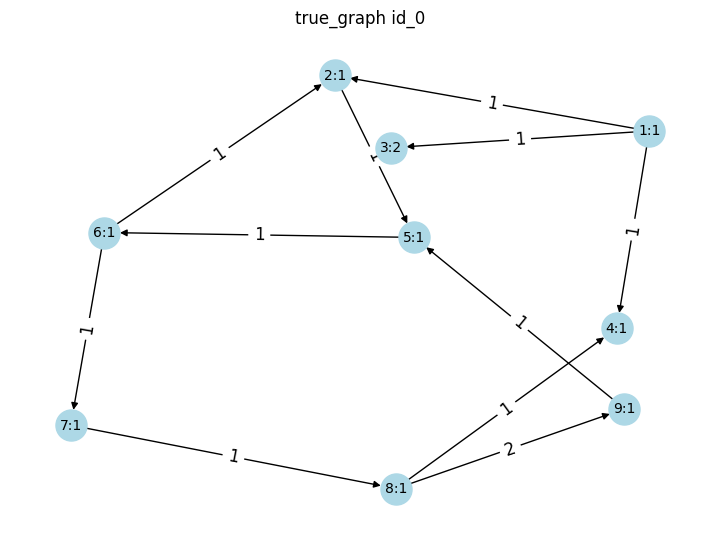

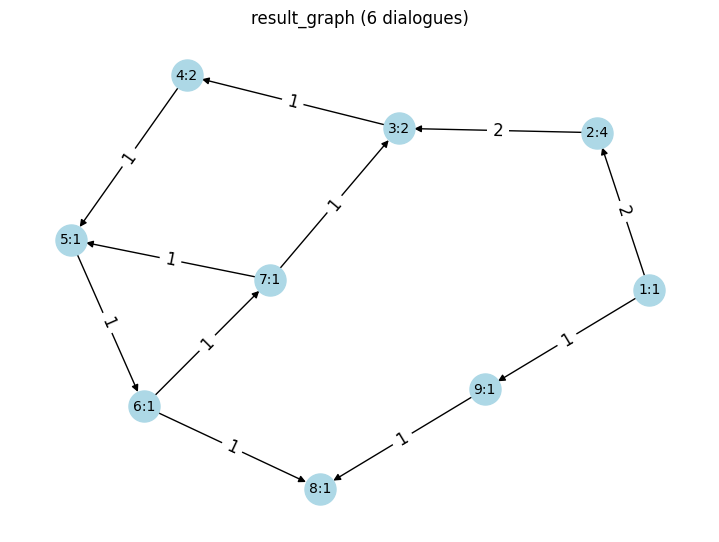

(11, 11)
{1: ['Hi there! How can I assist you today?'], 2: ['Great! What product are you interested in?'], 3: ['Of course! Our products include t-shirts, hoodies, and caps. How can I help you?', 'Sure! We offer t-shirts, hoodies, and caps. What would you like to know?'], 4: ['Alright, feel free to reach out anytime. Have a great day!'], 5: ['What size would you like?'], 6: ['Would you like that in red or blue?'], 7: ['Perfect! Can I have your shipping address?'], 8: ['Thank you! Your order has been placed. Is there anything else I can help you with?'], 9: ['Of course! What would you like to change?']}
The nodes of edges 1->4 and 9->8 have something in common,
                        but not a complete match:
                        Sources: ['Hi there! How can I assist you today?'], ['Never mind, thanks.']
The nodes of edges 1->4 and 9->8 have something in common,
                        but not a complete match:
                        Targets: ['Alright, feel free to reach out anytim

In [ ]:
with open("../data/gen24_graphid0_incrementation.json", 'r', encoding="utf-8") as f:
    example = json.load(f)
true_graph = Graph(example['graph'])
graphs = [graph for graph in example['incremental'].values()]
result_graph = Graph(graphs[-1])
print(f'is_same_structure:', is_same_structure(true_graph,result_graph), '\n----------------')
print(f'----------------\ntriplet_match_accuracy:', triplet_match_accuracy(true_graph,result_graph))
true_graph.visualise_short('true_graph id_0')
result_graph.visualise_short(f'result_graph ({len(graphs)} dialogues)')
graph_build_result[0] = triplet_match_accuracy(true_graph,result_graph)

In [ ]:
with open("../data/gen24_graphid1_incrementation.json", 'r', encoding="utf-8") as f:
    example = json.load(f)
true_graph = Graph(example['graph'])
graphs = [graph for graph in example['incremental'].values()]
result_graph = Graph(graphs[-1])
print(f'is_same_structure:', is_same_structure(true_graph,result_graph), '\n----------------')
print(f'----------------\ntriplet_match_accuracy:', triplet_match_accuracy(true_graph,result_graph))
true_graph.visualise_short('true_graph id_1')
result_graph.visualise_short(f'result_graph ({len(graphs)} dialogues)')
graph_build_result[1] = triplet_match_accuracy(true_graph,result_graph)

is_same_structure: False 
----------------
(9, 11)


KeyError: 'utterances'

is_same_structure: False 
----------------
(20, 19)
{1: ['Hello! How can I assist you today?'], 2: ["Sure, could you please specify the chatbot limitations you're facing?"], 3: ["I'm sorry to hear that. Can you provide more details about the fake account?"], 4: ['Certainly! Are you looking to respond to positive or negative reviews?'], 5: ['I understand. To help reduce delays, you can try optimizing your response scripts.'], 6: ["I'm sorry the chatbot isn't understanding user queries. You might consider updating its training data."], 7: ['To report impersonation, please visit our support page and submit the account details.'], 8: ['If the account is sending spam messages, you can block and report it directly from the platform.'], 9: ['When responding to negative reviews, maintain professionalism and address the concerns raised.'], 10: ['Acknowledge positive feedback and thank customers for their support to encourage loyalty.'], 11: ['Thank you for reaching out. If you need further assi

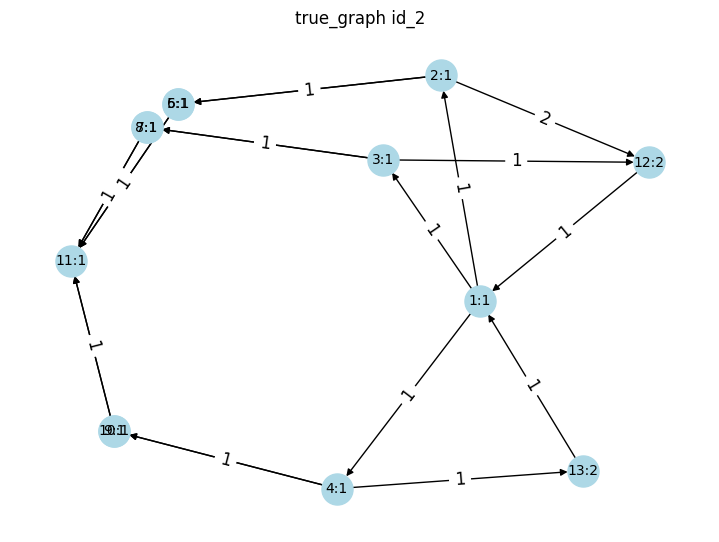

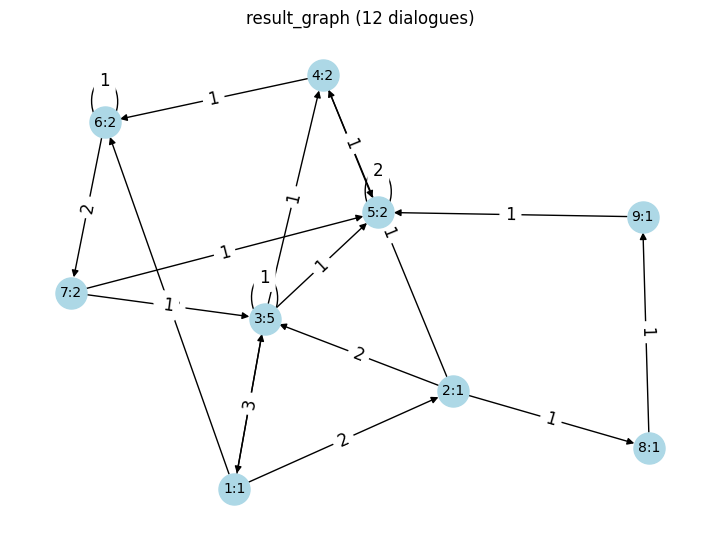

(20, 19)
{1: ['Hello! How can I assist you today?'], 2: ["Sure, could you please specify the chatbot limitations you're facing?"], 3: ["I'm sorry to hear that. Can you provide more details about the fake account?"], 4: ['Certainly! Are you looking to respond to positive or negative reviews?'], 5: ['I understand. To help reduce delays, you can try optimizing your response scripts.'], 6: ["I'm sorry the chatbot isn't understanding user queries. You might consider updating its training data."], 7: ['To report impersonation, please visit our support page and submit the account details.'], 8: ['If the account is sending spam messages, you can block and report it directly from the platform.'], 9: ['When responding to negative reviews, maintain professionalism and address the concerns raised.'], 10: ['Acknowledge positive feedback and thank customers for their support to encourage loyalty.'], 11: ['Thank you for reaching out. If you need further assistance, feel free to ask. Have a great day!

In [ ]:
with open("../data/gen24_graphid2_incrementation.json", 'r', encoding="utf-8") as f:
    example = json.load(f)
true_graph = Graph(example['graph'])
graphs = [graph for graph in example['incremental'].values()]
result_graph = Graph(graphs[-1])
print(f'is_same_structure:', is_same_structure(true_graph,result_graph), '\n----------------')
print(f'----------------\ntriplet_match_accuracy:', triplet_match_accuracy(true_graph,result_graph))
true_graph.visualise_short('true_graph id_2')
result_graph.visualise_short(f'result_graph ({len(graphs)} dialogues)')
graph_build_result[2] = triplet_match_accuracy(true_graph,result_graph)

is_same_structure: False 
----------------
(13, 9)
{1: ['Hello! How can I assist you with eco-friendly packaging today?', 'Hi there! What would you like to know about eco-friendly packaging?'], 2: ['Sure! There are several types of eco-friendly packaging such as biodegradable materials, recyclable plastics, and compostable containers. Would you like more details on any of these?'], 3: ['Absolutely! For businesses, sustainable packaging options include using recycled materials, reducing packaging size, and opting for reusable containers. Which of these are you interested in?'], 4: ['Eco-friendly packaging costs can vary based on materials and volume. Generally, they might be slightly more expensive upfront but can lead to savings in the long run through sustainability certifications and consumer preferences. Would you like a detailed cost analysis?'], 5: ['Of course! What types of eco-friendly packaging are you interested in exploring?'], 6: ['No problem! Which sustainable packaging opt

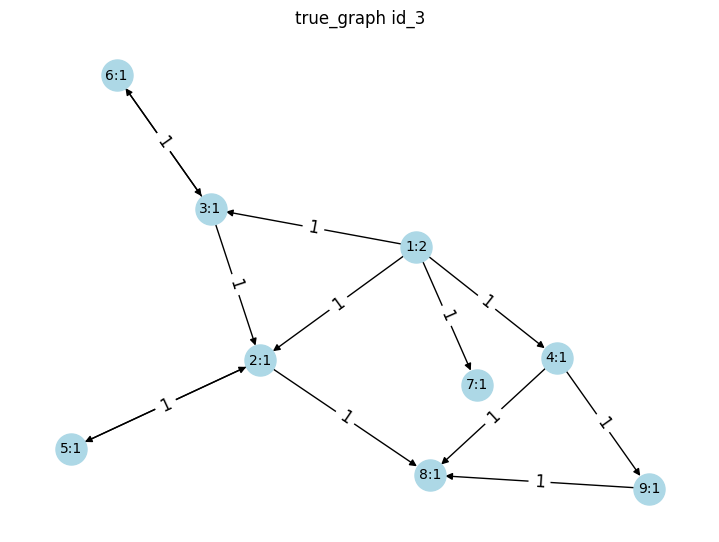

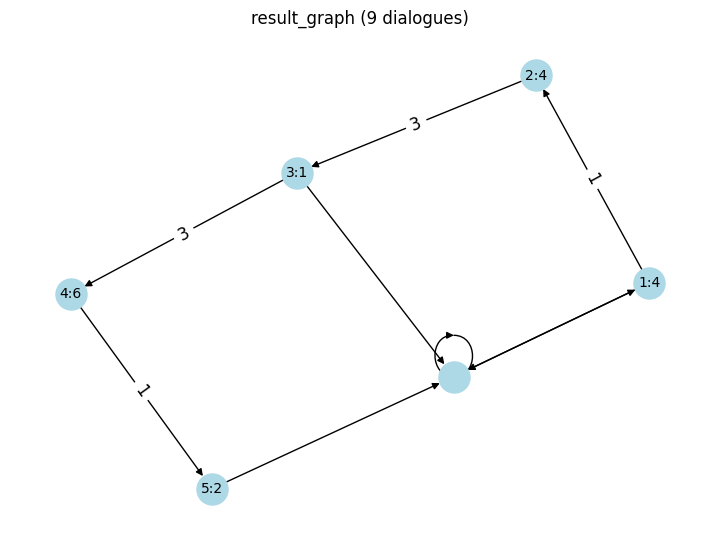

(13, 9)
{1: ['Hello! How can I assist you with eco-friendly packaging today?', 'Hi there! What would you like to know about eco-friendly packaging?'], 2: ['Sure! There are several types of eco-friendly packaging such as biodegradable materials, recyclable plastics, and compostable containers. Would you like more details on any of these?'], 3: ['Absolutely! For businesses, sustainable packaging options include using recycled materials, reducing packaging size, and opting for reusable containers. Which of these are you interested in?'], 4: ['Eco-friendly packaging costs can vary based on materials and volume. Generally, they might be slightly more expensive upfront but can lead to savings in the long run through sustainability certifications and consumer preferences. Would you like a detailed cost analysis?'], 5: ['Of course! What types of eco-friendly packaging are you interested in exploring?'], 6: ['No problem! Which sustainable packaging options would you like to discuss instead?'], 

In [ ]:
with open("../data/gen24_graphid3_incrementation.json", 'r', encoding="utf-8") as f:
    example = json.load(f)
true_graph = Graph(example['graph'])
graphs = [graph for graph in example['incremental'].values()]
result_graph = Graph(graphs[-1])
print(f'is_same_structure:', is_same_structure(true_graph,result_graph), '\n----------------')
print(f'----------------\ntriplet_match_accuracy:', triplet_match_accuracy(true_graph,result_graph))
true_graph.visualise_short('true_graph id_3')
result_graph.visualise_short(f'result_graph ({len(graphs)} dialogues)')
graph_build_result[3] = triplet_match_accuracy(true_graph,result_graph)

is_same_structure: False 
----------------
(16, 16)
{1: ['Hello! How can I assist you today?'], 2: ['I understand you have concerns about ethical sourcing. Could you please elaborate on what specifically worries you?'], 3: ['We ensure ethical standards by regularly auditing our suppliers and requiring certifications such as Fair Trade. Would you like more details on our auditing process?'], 4: ['We take the environmental impact seriously by using sustainable materials and reducing our carbon footprint. Would you like to know about our sustainability initiatives?'], 5: ["Sure, let's focus on labor practices. We ensure fair wages and safe working conditions through our comprehensive policies. Do you have specific questions on labor ethics?"], 6: ['Absolutely! Our auditing process includes on-site visits and regular reporting to ensure compliance. Do you have any other questions?', 'Certainly! We conduct thorough inspections and partner with third-party auditors to maintain our standards.

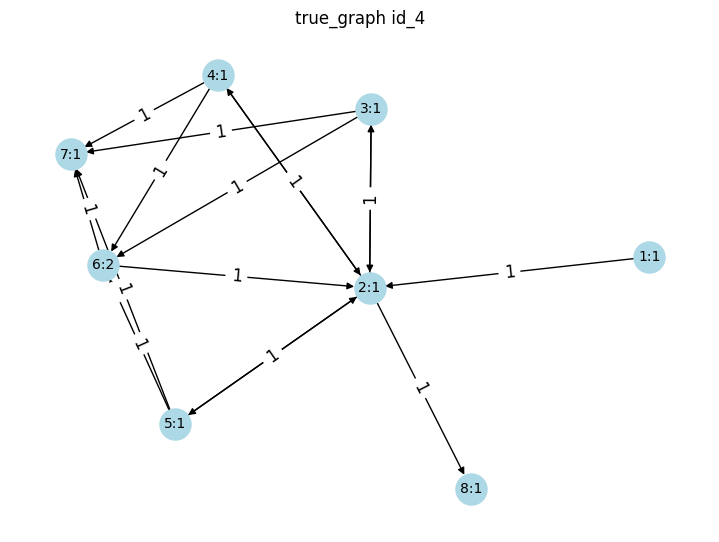

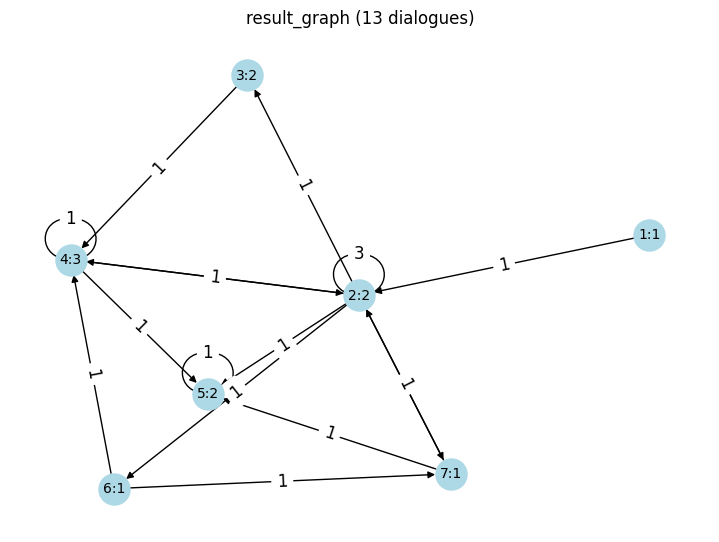

(16, 16)
{1: ['Hello! How can I assist you today?'], 2: ['I understand you have concerns about ethical sourcing. Could you please elaborate on what specifically worries you?'], 3: ['We ensure ethical standards by regularly auditing our suppliers and requiring certifications such as Fair Trade. Would you like more details on our auditing process?'], 4: ['We take the environmental impact seriously by using sustainable materials and reducing our carbon footprint. Would you like to know about our sustainability initiatives?'], 5: ["Sure, let's focus on labor practices. We ensure fair wages and safe working conditions through our comprehensive policies. Do you have specific questions on labor ethics?"], 6: ['Absolutely! Our auditing process includes on-site visits and regular reporting to ensure compliance. Do you have any other questions?', 'Certainly! We conduct thorough inspections and partner with third-party auditors to maintain our standards.'], 7: ["If that's all, I'm glad I could he

In [ ]:
with open("../data/gen24_graphid4_incrementation.json", 'r', encoding="utf-8") as f:
    example = json.load(f)
true_graph = Graph(example['graph'])
graphs = [graph for graph in example['incremental'].values()]
result_graph = Graph(graphs[-1])
print(f'is_same_structure:', is_same_structure(true_graph,result_graph), '\n----------------')
print(f'----------------\ntriplet_match_accuracy:', triplet_match_accuracy(true_graph,result_graph))
true_graph.visualise_short('true_graph id_4')
result_graph.visualise_short(f'result_graph ({len(graphs)} dialogues)')
graph_build_result[4] = triplet_match_accuracy(true_graph,result_graph)

In [ ]:
graph_build_result

{0: {'node_accuracy': 0.8888888888888888, 'edge_accuracy': 0.6363636363636364},
 2: {'node_accuracy': 0.6153846153846154, 'edge_accuracy': 0.45},
 3: {'node_accuracy': 0.6666666666666666, 'edge_accuracy': 0.3076923076923077},
 4: {'node_accuracy': 0.875, 'edge_accuracy': 0.5625}}

In [22]:
import glob


def iteration(src: str):
    with open(src, 'r', encoding="utf-8") as f:
        example = json.load(f)
    true_graph = Graph(example['graph'])
    graphs = [graph for graph in example['incremental'].values()]
    result_graph = Graph(graphs[-1])
    return triplet_match_accuracy(true_graph,result_graph)


graph_build_result = {}

for src in glob.glob('../data2/4o-mini/gen24*'):
    n_id = src.split('\\')[-1].split('_')[1][7:]
    n_id = int(n_id)
    try:
        graph_build_result[n_id] = iteration(src)
    except:
        graph_build_result[n_id] = None

(11, 10)
{1: ['Hello! What can I help you with today?', 'Hi! What assistance do you need today?', 'Hi! What can I do for you today?', 'Hey! How may I help you today?', 'Hey there! How may I assist you?', 'Hey there! How may I assist you today?', 'Hey there! What assistance do you need today?', 'Hello! How can I help you today?', 'Hello! What can I do for you today?', 'Hi! What do you need help with today?', 'Hi there! How can I assist you today?', 'Hi! Is there something I can assist you with today?', 'Hey there! What can I do for you today?'], 2: ['Fantastic! What item are you interested in?', 'Sure thing! What product do you want now?', 'Great! What product are you interested in?', 'Awesome! Which product are you looking to buy?', 'Sounds good! What item do you want to order?', 'No problem! What would you like to order instead?', 'Sounds good! What item do you have in mind?', 'Got it! What are you interested in ordering?', 'Great! What would you like to order?', 'Awesome! Which produ

In [18]:
import pandas as pd

df = pd.DataFrame(graph_build_result)
display(df.T)
df.T.mean()

,node_accuracy,edge_accuracy
0,1.000000,1.000000
10,0.888889,0.666667
11,1.000000,1.000000
12,0.875000,0.800000
13,1.000000,1.000000
14,1.000000,0.909091
15,1.000000,0.800000
16,0.600000,0.307692
17,0.909091,0.714286
18,0.625000,0.312500


node_accuracy    0.894120
edge_accuracy    0.760566
dtype: float64

# gpt-o3-mini

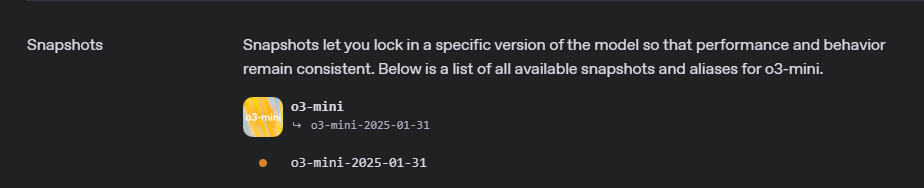

In [12]:
model_name = "o3-mini-2025-01-31"


In [13]:
import os
os.environ['PATH_TO_ENV'] = ".env_o3-mini-2025-01-31"

In [14]:
from three_stages_1 import ThreeStagesGraphGenerator as Generator
from three_stages_0i import ThreeStagesGraphGenerator as GeneratorI0

graph_generator = Generator(model_name) # To generate 1st graph from one dialogue
graph_generator_llm = GeneratorI0() # To add dialogue to existing graph with LLM

In [15]:
import json
from dialogue2graph.pipelines.core.dialogue import Dialogue
from dialogue2graph.pipelines.core.graph import Graph

In [16]:
from dialogue2graph.metrics.automatic_metrics import is_same_structure, triplet_match_accuracy

In [17]:
path = '../data2/gen_dataset_augmented_0-402_combined.json'
with open(path, 'r', encoding="utf-8") as f:
    generated_24 = json.load(f)

In [18]:
new_data = []

for id, example in enumerate(generated_24[:12]):
    # new example
    dialogues = example['dialogues']
    print('ID: ', id, ' len: ', len(dialogues))
    example['incremental'] = {}
    for i in range(len(dialogues)):
        example['incremental'].setdefault(f'graph_{i}')

    # Generation of the 1st graph
    first_dialogue = Dialogue.from_list(dialogues[0]['messages'])
    first_graph = graph_generator.invoke([first_dialogue])
    example['incremental']['graph_0'] = first_graph.graph_dict
    with open(f"../data2/o3-mini/gen24_graphid{id}_incrementation.json", "w", encoding="utf-8") as file:
        json.dump(example, file, indent=4, sort_keys=True)

    # graph incrementation
    for i in range(len(dialogues)):
        if i == 0:
            result_graph = Graph(example['incremental']['graph_0'])
        else:
            new_dialogue = Dialogue.from_list(dialogues[i]['messages'])
            try:
                result_graph = graph_generator_llm.invoke([new_dialogue], result_graph)
                example['incremental'][f'graph_{i}'] = result_graph.graph_dict

                with open(f"../data2/o3-mini/gen24_graphid{id}_incrementation.json", "w", encoding="utf-8") as file:
                    json.dump(example, file, indent=4, sort_keys=True)

            except Exception as e:
                raise e
    new_data.append(example)

ID:  0  len:  6
ID:  1  len:  12
ID:  2  len:  12
ID:  3  len:  9
ID:  4  len:  13
ID:  5  len:  12
ID:  6  len:  5
ID:  7  len:  16
ID:  8  len:  10
ID:  9  len:  6
ID:  10  len:  16
ID:  11  len:  5


In [21]:
import glob


def iteration(src: str):
    with open(src, 'r', encoding="utf-8") as f:
        example = json.load(f)
    true_graph = Graph(example['graph'])
    graphs = [graph for graph in example['incremental'].values()]
    result_graph = Graph(graphs[-1])
    return triplet_match_accuracy(true_graph,result_graph)


graph_build_result = {}

for src in glob.glob('../data2/o3-mini//gen24*'):
    n_id = src.split('\\')[-1].split('_')[1][7:]
    n_id = int(n_id)
    try:
        graph_build_result[n_id] = iteration(src)
    except:
        graph_build_result[n_id] = None

import pandas as pd

df = pd.DataFrame(graph_build_result)
display(df.T)
df.T.mean()

(11, 14)
(18, 11)
{1: ['Greetings! How may I help you today?', 'Hi there! What can I do for you today?', 'Greetings! What can I do for you today?', 'Hello! How may I assist you this fine day?', 'Greetings! What assistance do you need today?', 'Hello! What assistance do you need today?', 'Greetings! What do you need assistance with today?', 'Greetings! How can I be of service to you today?', 'Hi there! What can I help you with today?', 'Hi there! How can I help you today?', 'Greetings! How can I assist you right now?', 'Greetings! How may I assist you today?', 'Hello! How can I assist you today?', 'Hello! What can I do for you today?', 'Hi there! How may I help you today?', 'Hello! How can I support you today?', 'Hello! How may I help you today?'], 2: ["Of course! I'm here to help with your account. What specific assistance do you need?", 'Sure! What else can I assist you with regarding your account?', 'Sure! How can I help you with your account today?', 'Of course! What specifically do

,node_accuracy,edge_accuracy
0,None,None
10,0.888889,0.555556
11,0.75,0.4
1,0.625,0.444444
2,0.384615,0.2
3,1.0,0.769231
4,0.875,0.4375
5,1.0,0.615385
6,0.75,0.444444
7,0.0,0.0


node_accuracy    0.721834
edge_accuracy    0.474272
dtype: object

In [10]:
df.T.corr()

NameError: name 'df' is not defined

In [41]:
graph_build_result = {}

is_same_structure: False 
----------------
(11, 12)
{1: ['Hi there! How can I assist you today?'], 2: ['Great! What product are you interested in?'], 3: ['Of course! Our products include t-shirts, hoodies, and caps. How can I help you?', 'Sure! We offer t-shirts, hoodies, and caps. What would you like to know?'], 4: ['Alright, feel free to reach out anytime. Have a great day!'], 5: ['What size would you like?'], 6: ['Would you like that in red or blue?'], 7: ['Perfect! Can I have your shipping address?'], 8: ['Thank you! Your order has been placed. Is there anything else I can help you with?'], 9: ['Of course! What would you like to change?']}
The nodes of edges 1->2 and 9->2 have something in common,
                        but not a complete match:
                        Sources: ['Hi there! How can I assist you today?'], ['Of course! Our products include t-shirts, hoodies, and caps.']
The nodes of edges 1->2 and 9->2 have something in common,
                        but not a compl

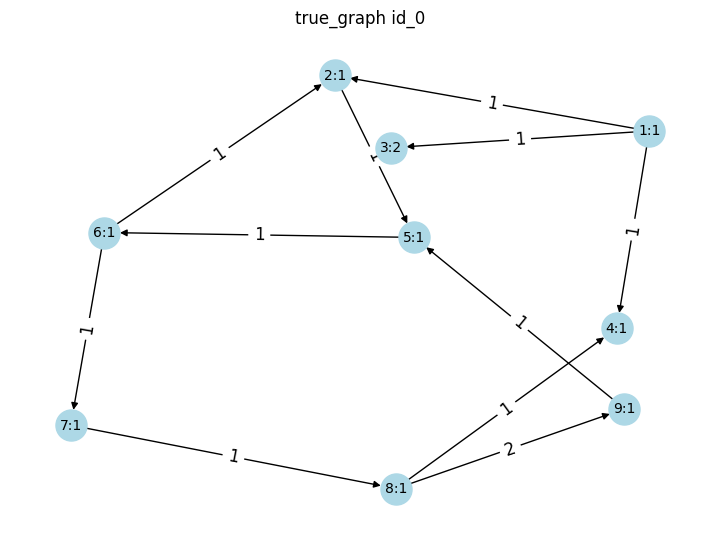

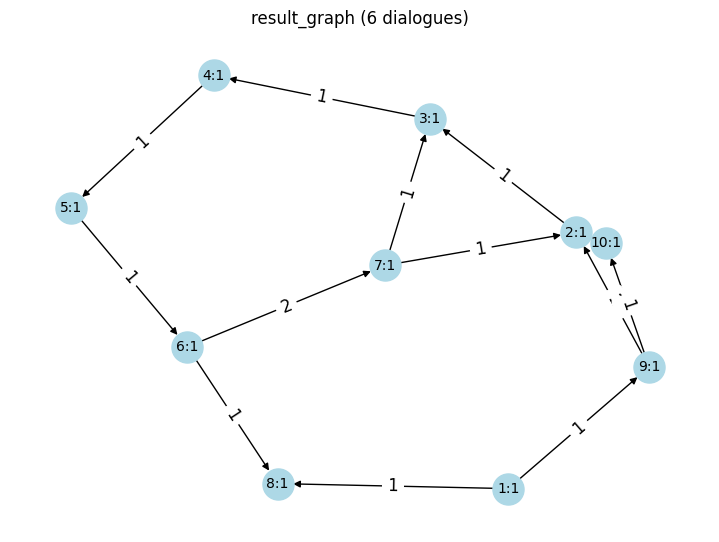

(11, 12)
{1: ['Hi there! How can I assist you today?'], 2: ['Great! What product are you interested in?'], 3: ['Of course! Our products include t-shirts, hoodies, and caps. How can I help you?', 'Sure! We offer t-shirts, hoodies, and caps. What would you like to know?'], 4: ['Alright, feel free to reach out anytime. Have a great day!'], 5: ['What size would you like?'], 6: ['Would you like that in red or blue?'], 7: ['Perfect! Can I have your shipping address?'], 8: ['Thank you! Your order has been placed. Is there anything else I can help you with?'], 9: ['Of course! What would you like to change?']}
The nodes of edges 1->2 and 9->2 have something in common,
                        but not a complete match:
                        Sources: ['Hi there! How can I assist you today?'], ['Of course! Our products include t-shirts, hoodies, and caps.']
The nodes of edges 1->2 and 9->2 have something in common,
                        but not a complete match:
                        Targets:

In [40]:
with open("../data/gen24_graphid0_incrementation.json", 'r', encoding="utf-8") as f:
    example = json.load(f)
true_graph = Graph(example['graph'])
graphs = [graph for graph in example['incremental'].values()]
result_graph = Graph(graphs[-1])
print(f'is_same_structure:', is_same_structure(true_graph,result_graph), '\n----------------')
print(f'----------------\ntriplet_match_accuracy:', triplet_match_accuracy(true_graph,result_graph))
true_graph.visualise_short('true_graph id_0')
result_graph.visualise_short(f'result_graph ({len(graphs)} dialogues)')
graph_build_result[0] = triplet_match_accuracy(true_graph,result_graph)

is_same_structure: False 
----------------
(9, 9)
{1: ["Hello! I'm sorry you're experiencing issues. How can I assist you today?"], 2: ["I'm sorry to hear that you're having trouble with your account. Can you please provide more details?"], 3: ['Have you tried resetting your password?'], 4: ["I'm sorry resetting your password didn't help. Would you like me to escalate this issue to our support team?"], 5: ['Certainly! Please provide your new email address.', 'Of course! What email address would you like to use instead?'], 6: ['Your email has been updated successfully. Is there anything else I can help you with?'], 7: ["I've escalated your issue. You should receive an email with further instructions shortly."], 8: ['Thank you for reaching out. Have a great day!', "We're here to help if you need anything else. Goodbye!"]}
----------------
triplet_match_accuracy: {'node_accuracy': 0.0, 'edge_accuracy': 0.0}


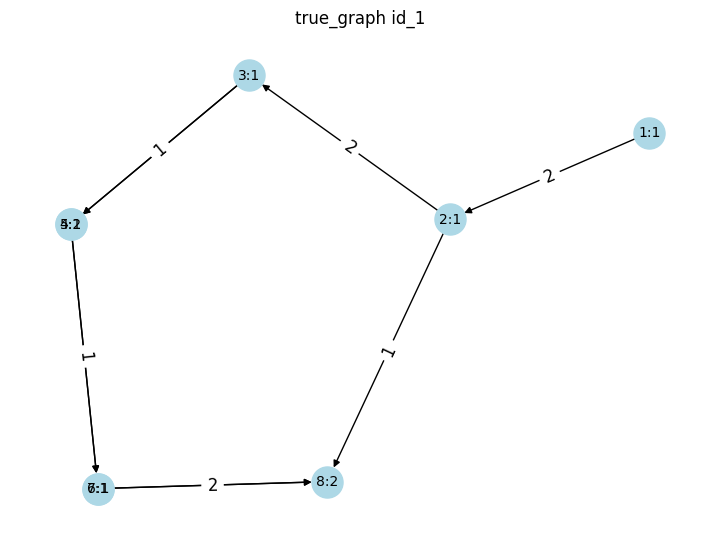

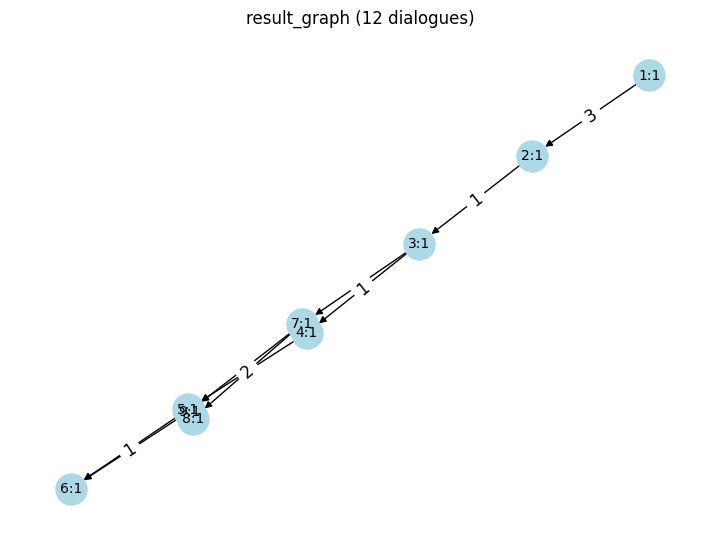

(9, 9)
{1: ["Hello! I'm sorry you're experiencing issues. How can I assist you today?"], 2: ["I'm sorry to hear that you're having trouble with your account. Can you please provide more details?"], 3: ['Have you tried resetting your password?'], 4: ["I'm sorry resetting your password didn't help. Would you like me to escalate this issue to our support team?"], 5: ['Certainly! Please provide your new email address.', 'Of course! What email address would you like to use instead?'], 6: ['Your email has been updated successfully. Is there anything else I can help you with?'], 7: ["I've escalated your issue. You should receive an email with further instructions shortly."], 8: ['Thank you for reaching out. Have a great day!', "We're here to help if you need anything else. Goodbye!"]}


In [41]:
with open("../data/gen24_graphid1_incrementation.json", 'r', encoding="utf-8") as f:
    example = json.load(f)
true_graph = Graph(example['graph'])
graphs = [graph for graph in example['incremental'].values()]
result_graph = Graph(graphs[-1])
print(f'is_same_structure:', is_same_structure(true_graph,result_graph), '\n----------------')
print(f'----------------\ntriplet_match_accuracy:', triplet_match_accuracy(true_graph,result_graph))
true_graph.visualise_short('true_graph id_1')
result_graph.visualise_short(f'result_graph ({len(graphs)} dialogues)')
graph_build_result[1] = triplet_match_accuracy(true_graph,result_graph)

is_same_structure: False 
----------------
(20, 8)
{1: ['Hello! How can I assist you today?'], 2: ["Sure, could you please specify the chatbot limitations you're facing?"], 3: ["I'm sorry to hear that. Can you provide more details about the fake account?"], 4: ['Certainly! Are you looking to respond to positive or negative reviews?'], 5: ['I understand. To help reduce delays, you can try optimizing your response scripts.'], 6: ["I'm sorry the chatbot isn't understanding user queries. You might consider updating its training data."], 7: ['To report impersonation, please visit our support page and submit the account details.'], 8: ['If the account is sending spam messages, you can block and report it directly from the platform.'], 9: ['When responding to negative reviews, maintain professionalism and address the concerns raised.'], 10: ['Acknowledge positive feedback and thank customers for their support to encourage loyalty.'], 11: ['Thank you for reaching out. If you need further assis

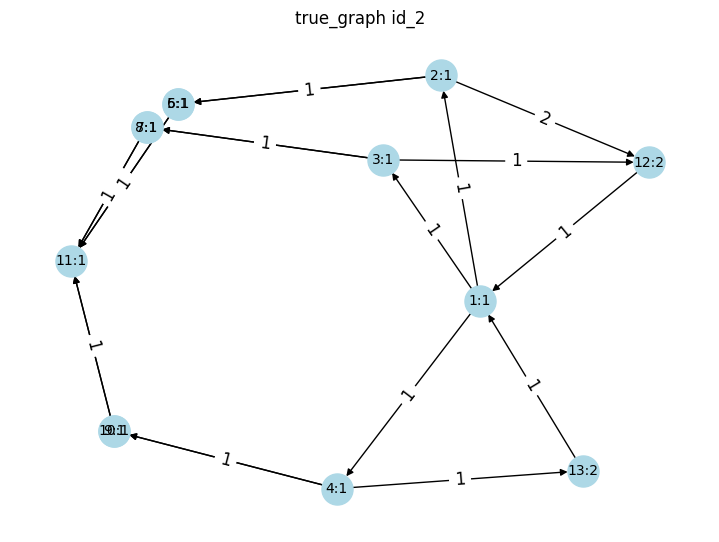

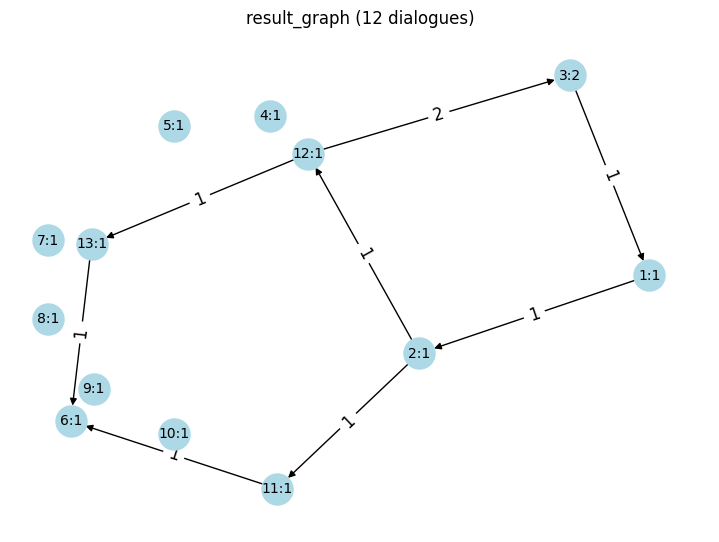

(20, 8)
{1: ['Hello! How can I assist you today?'], 2: ["Sure, could you please specify the chatbot limitations you're facing?"], 3: ["I'm sorry to hear that. Can you provide more details about the fake account?"], 4: ['Certainly! Are you looking to respond to positive or negative reviews?'], 5: ['I understand. To help reduce delays, you can try optimizing your response scripts.'], 6: ["I'm sorry the chatbot isn't understanding user queries. You might consider updating its training data."], 7: ['To report impersonation, please visit our support page and submit the account details.'], 8: ['If the account is sending spam messages, you can block and report it directly from the platform.'], 9: ['When responding to negative reviews, maintain professionalism and address the concerns raised.'], 10: ['Acknowledge positive feedback and thank customers for their support to encourage loyalty.'], 11: ['Thank you for reaching out. If you need further assistance, feel free to ask. Have a great day!'

In [42]:
with open("../data/gen24_graphid2_incrementation.json", 'r', encoding="utf-8") as f:
    example = json.load(f)
true_graph = Graph(example['graph'])
graphs = [graph for graph in example['incremental'].values()]
result_graph = Graph(graphs[-1])
print(f'is_same_structure:', is_same_structure(true_graph,result_graph), '\n----------------')
print(f'----------------\ntriplet_match_accuracy:', triplet_match_accuracy(true_graph,result_graph))
true_graph.visualise_short('true_graph id_2')
result_graph.visualise_short(f'result_graph ({len(graphs)} dialogues)')
graph_build_result[2] = triplet_match_accuracy(true_graph,result_graph)

is_same_structure: False 
----------------
(13, 16)
{1: ['Hello! How can I assist you with eco-friendly packaging today?', 'Hi there! What would you like to know about eco-friendly packaging?'], 2: ['Sure! There are several types of eco-friendly packaging such as biodegradable materials, recyclable plastics, and compostable containers. Would you like more details on any of these?'], 3: ['Absolutely! For businesses, sustainable packaging options include using recycled materials, reducing packaging size, and opting for reusable containers. Which of these are you interested in?'], 4: ['Eco-friendly packaging costs can vary based on materials and volume. Generally, they might be slightly more expensive upfront but can lead to savings in the long run through sustainability certifications and consumer preferences. Would you like a detailed cost analysis?'], 5: ['Of course! What types of eco-friendly packaging are you interested in exploring?'], 6: ['No problem! Which sustainable packaging op

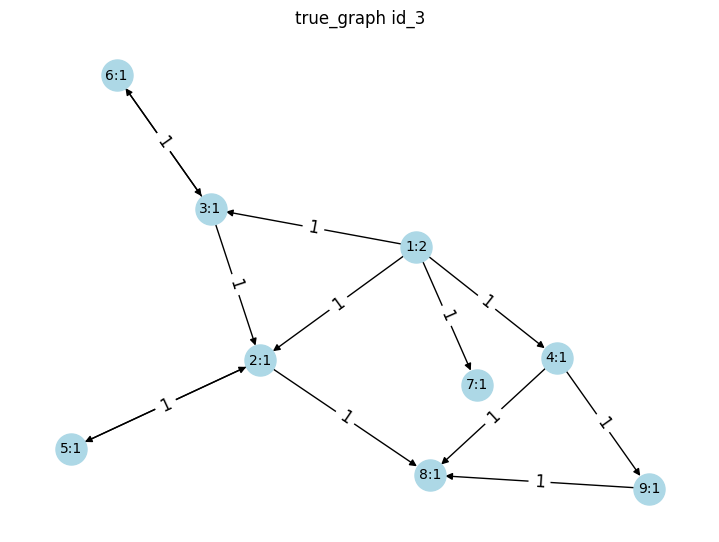

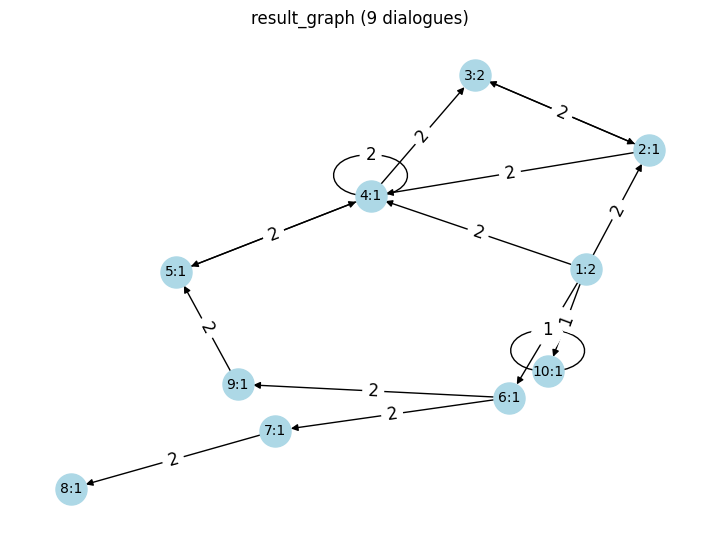

(13, 16)
{1: ['Hello! How can I assist you with eco-friendly packaging today?', 'Hi there! What would you like to know about eco-friendly packaging?'], 2: ['Sure! There are several types of eco-friendly packaging such as biodegradable materials, recyclable plastics, and compostable containers. Would you like more details on any of these?'], 3: ['Absolutely! For businesses, sustainable packaging options include using recycled materials, reducing packaging size, and opting for reusable containers. Which of these are you interested in?'], 4: ['Eco-friendly packaging costs can vary based on materials and volume. Generally, they might be slightly more expensive upfront but can lead to savings in the long run through sustainability certifications and consumer preferences. Would you like a detailed cost analysis?'], 5: ['Of course! What types of eco-friendly packaging are you interested in exploring?'], 6: ['No problem! Which sustainable packaging options would you like to discuss instead?'],

In [43]:
with open("../data/gen24_graphid3_incrementation.json", 'r', encoding="utf-8") as f:
    example = json.load(f)
true_graph = Graph(example['graph'])
graphs = [graph for graph in example['incremental'].values()]
result_graph = Graph(graphs[-1])
print(f'is_same_structure:', is_same_structure(true_graph,result_graph), '\n----------------')
print(f'----------------\ntriplet_match_accuracy:', triplet_match_accuracy(true_graph,result_graph))
true_graph.visualise_short('true_graph id_3')
result_graph.visualise_short(f'result_graph ({len(graphs)} dialogues)')
graph_build_result[3] = triplet_match_accuracy(true_graph,result_graph)

In [45]:
with open("../data/gen24_graphid4_incrementation.json", 'r', encoding="utf-8") as f:
    example = json.load(f)
true_graph = Graph(example['graph'])
graphs = [graph for graph in example['incremental'].values()]
result_graph = Graph(graphs[-1])
print(f'is_same_structure:', is_same_structure(true_graph,result_graph), '\n----------------')
print(f'----------------\ntriplet_match_accuracy:', triplet_match_accuracy(true_graph,result_graph))
true_graph.visualise_short('true_graph id_4')
result_graph.visualise_short(f'result_graph ({len(graphs)} dialogues)')
graph_build_result[4] = triplet_match_accuracy(true_graph,result_graph)

is_same_structure: False 
----------------
(16, 16)


KeyError: 'utterances'

In [ ]:
graph_build_result

{0: {'node_accuracy': 1.0, 'edge_accuracy': 1.0},
 1: {'node_accuracy': 1.0, 'edge_accuracy': 0.8888888888888888},
 2: {'node_accuracy': 0.7692307692307693, 'edge_accuracy': 0.65},
 3: {'node_accuracy': 1.0, 'edge_accuracy': 1.0},
 4: {'node_accuracy': 1.0, 'edge_accuracy': 0.8125}}

In [ ]:
import pandas as pd

df = pd.DataFrame(graph_build_result)
df.T.mean()

node_accuracy    0.953846
edge_accuracy    0.870278
dtype: float64

# Бейзлайн

| Модель | node_accuracy | edge_accuracy |
|-----------|-----------|-----------|
| **gpt-4o** | 0.116  | 0.058  |
| **gpt-4o-mini**  | 0.74 | 0.4459 |
| **o3-mini**  | 0.969  | 0.8515 |

# OutputFixing

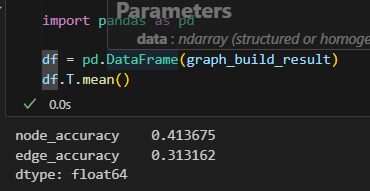
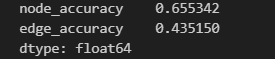
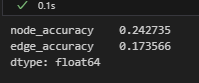

Обновлённая сводная таблица с новыми метриками:

| Модель        | node_accuracy | edge_accuracy |
|---------------|---------------|---------------|
| **gpt-4o**    | 0.4137        | 0.3132        |
| **gpt-4o-mini** | 0.6553        | 0.4352        |
| **o3-mini**     | 0.2427        | 0.1736        |


# OutputFixing + пример диалога для one-shot
4o 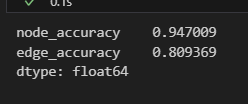

4o-mini 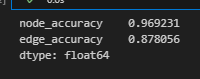

o3-mini 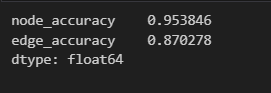

| Модель | node_accuracy | edge_accuracy |
|-----------|-----------|-----------|
| **gpt-4o-mini**  | 0.85 | 0.834 |
| **o3-mini**  | 0.88  | 0.754 |

# OutputFixing + few-shot + instruct


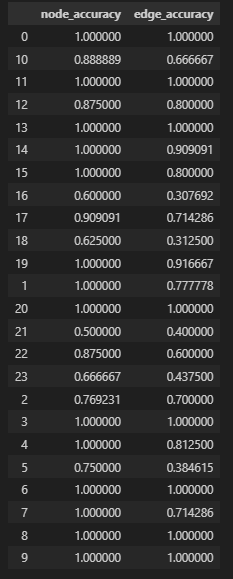
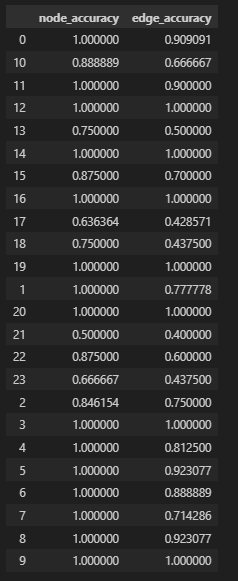

| Модель        | node_accuracy | edge_accuracy |
|---------------|---------------|---------------|
| **gpt-4o-mini** | 0.8941        | 0.7696        |
| **o3-mini**     | 0.9078        | 0.7820        |

Проблемы 

4o-mini:

    16, 18, 21, 22, 23, 5

o3-mini:

    13, 17, 18, 21, 22, 23

Общие:

    18, 21, 22, 23


18, 21, 22, 23 - много диалогов

In [11]:
import json


with open('../data/gen24_graphid16_incrementation.json', 'r') as f:
    g18 = json.load(f)

g18 

{'dialogues': [{'messages': [{'participant': 'assistant',
     'text': 'Hello! How can I assist you with your IoT device connectivity today?'},
    {'participant': 'user', 'text': 'I want to connect my smart light.'},
    {'participant': 'assistant',
     'text': 'Which IoT device are you trying to connect?'},
    {'participant': 'user', 'text': "It's a smart light."},
    {'participant': 'assistant',
     'text': 'Would you like to connect your device via Wi-Fi or Ethernet?'},
    {'participant': 'user', 'text': 'Wi-Fi'},
    {'participant': 'assistant',
     'text': 'Could you provide your Wi-Fi network name, please?'},
    {'participant': 'user', 'text': 'HomeNetwork'},
    {'participant': 'assistant', 'text': 'Please enter your Wi-Fi password.'},
    {'participant': 'user', 'text': "The password didn't work."},
    {'participant': 'assistant',
     'text': 'I encountered an error connecting your device.'},
    {'participant': 'user', 'text': "I'd like to modify my Wi-Fi settings."}

In [26]:
g18.keys

<function dict.keys>

In [24]:
import glob
import json

d = {}
for src in glob.glob('../data/gen24*'):
    tmp = {}
    n_id = src.split('\\')[-1].split('_')[1][7:]
    n_id = int(n_id)
    with open(src, 'r') as f:
        g_tmp = json.load(f)
    tmp['dialogs cnt'] = len(g_tmp['dialogues'])
    tmp['edges cnt'] = len(g_tmp['graph']['edges'])
    tmp['nodes cnt'] = len(g_tmp['graph']['nodes'])
    d[n_id] = tmp

import pandas as pd


df = pd.DataFrame(d).T.sort_values('dialogs cnt', ascending=False)
df

,dialogs cnt,edges cnt,nodes cnt
21,31,10,8
17,20,14,11
18,19,16,8
23,18,16,9
7,17,21,10
22,17,10,8
10,16,18,9
4,13,16,8
5,12,13,8
2,12,20,13


is_same_structure: False 
----------------
(13, 16)
{1: ['Hello! How can I assist you with your IoT device connectivity today?'], 2: ['Which IoT device are you trying to connect?'], 3: ['Would you like to connect your device via Wi-Fi or Ethernet?'], 4: ['Could you provide your Wi-Fi network name, please?', 'Please enter your Wi-Fi network name.'], 5: ['Please enter your Wi-Fi password.'], 6: ['Your device is now successfully connected to the Wi-Fi network!', 'Your device is now successfully connected to the Ethernet network!'], 7: ['I encountered an error connecting your device.'], 8: ['Would you like to retry entering your Wi-Fi details or modify them?'], 9: ["Please connect your device to the Ethernet cable and let me know when you're ready."], 10: ['Okay, if you need any further assistance, feel free to ask. Have a great day!']}
The nodes of edges 3->10 and 6->9 have something in common,
                        but not a complete match:
                        Sources: ['Would you 

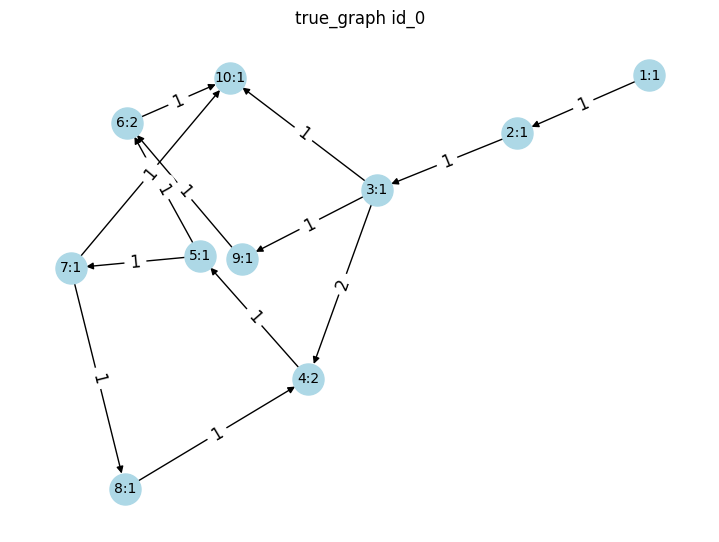

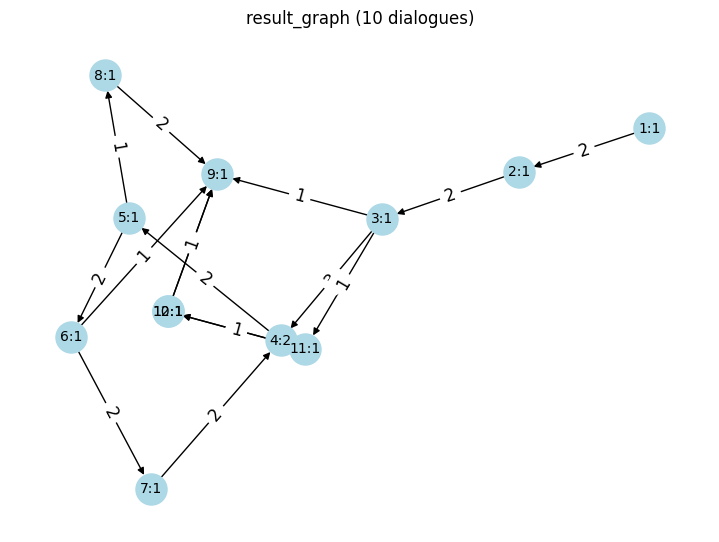

(13, 16)
{1: ['Hello! How can I assist you with your IoT device connectivity today?'], 2: ['Which IoT device are you trying to connect?'], 3: ['Would you like to connect your device via Wi-Fi or Ethernet?'], 4: ['Could you provide your Wi-Fi network name, please?', 'Please enter your Wi-Fi network name.'], 5: ['Please enter your Wi-Fi password.'], 6: ['Your device is now successfully connected to the Wi-Fi network!', 'Your device is now successfully connected to the Ethernet network!'], 7: ['I encountered an error connecting your device.'], 8: ['Would you like to retry entering your Wi-Fi details or modify them?'], 9: ["Please connect your device to the Ethernet cable and let me know when you're ready."], 10: ['Okay, if you need any further assistance, feel free to ask. Have a great day!']}
The nodes of edges 3->10 and 6->9 have something in common,
                        but not a complete match:
                        Sources: ['Would you like to connect your device via Wi-Fi or Et

NameError: name 'graph_build_result' is not defined

In [17]:
with open("../data/gen24_graphid16_incrementation.json", 'r', encoding="utf-8") as f:
    example = json.load(f)
true_graph = Graph(example['graph'])
graphs = [graph for graph in example['incremental'].values()]
result_graph = Graph(graphs[-1])
print(f'is_same_structure:', is_same_structure(true_graph,result_graph), '\n----------------')
print(f'----------------\ntriplet_match_accuracy:', triplet_match_accuracy(true_graph,result_graph))
true_graph.visualise_short('true_graph id_0')
result_graph.visualise_short(f'result_graph ({len(graphs)} dialogues)')
graph_build_result[0] = triplet_match_accuracy(true_graph,result_graph)

# Вывод

Добавление OutputFixing с моделью gpt-4o-mini позволяется исправлять выход основной модели без необходимости ее вызова целиком, что оптимизирует расходы на генерацию и скорость отработки пайплайна.
Добавление примера диалога в к имеющимуся примеру выходного графа в one-shot промпте сильно улучшило скор всех моделей, выровнив их до почти одинаково высокого результата.